### Hands-On PMML ### 

keras + iris

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.2)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)
Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

X_train (108, 4)
X_val (27, 4)
X_test (15, 4)


In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [3]:
history = model.fit(X_train,Y_train,epochs=64,batch_size=5,validation_data=(X_val,Y_val))
model.summary()

Epoch 1/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3153 - loss: 1.6627 - val_acc: 0.7037 - val_loss: 0.9304
Epoch 2/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6237 - loss: 0.9191 - val_acc: 0.5926 - val_loss: 0.8278
Epoch 3/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7038 - loss: 0.7545 - val_acc: 0.6296 - val_loss: 0.7111
Epoch 4/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7458 - loss: 0.6625 - val_acc: 0.5926 - val_loss: 0.6773
Epoch 5/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8247 - loss: 0.6096 - val_acc: 0.5926 - val_loss: 0.6230
Epoch 6/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7492 - loss: 0.5418 - val_acc: 0.5926 - val_loss: 0.6019
Epoch 7/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8521 - loss: 0.5206 - val_acc: 0.7407 - val_loss: 0.5646
Epoch 8/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8435 - loss: 0.5144 - val_acc: 0.7778 - val_loss: 0.5403
Epoch 9/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8491 - loss: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,547 (6.05 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,032 (4.04 KB)

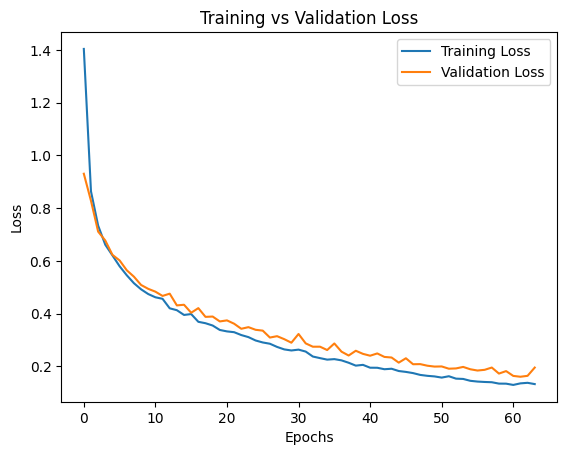

In [5]:
import matplotlib.pyplot as plt
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing MLP:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9333 - loss: 0.0932
Akurasi Testing MLP: 0.9333333373069763
